# Load Image

In [ ]:
# import libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
from google.colab import drive
drive.mount('/content/drive')
import os
import pickle

import cv2
import numpy as np
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#images_train_path = '/content/drive/MyDrive/IndonesiaAI/Computer Vision/dataset/images_prepped_train/'
anots_train_path = '/content/drive/MyDrive/IndonesiaAI/Computer Vision/dataset/annotations_prepped_train/'
images_test_path = '/content/drive/MyDrive/IndonesiaAI/Computer Vision/dataset/images_prepped_test/'
anots_test_path = '/content/drive/MyDrive/IndonesiaAI/Computer Vision/dataset/annotations_prepped_test/'

In [ ]:
#list_img_train = np.sort(next(os.walk(images_train_path), (None, None, []))[2])
list_annot_train = np.sort(next(os.walk(anots_train_path), (None, None, []))[2])
list_img_test = np.sort(next(os.walk(images_test_path), (None, None, []))[2])
list_annot_test = np.sort(next(os.walk(anots_test_path), (None, None, []))[2])
#print('jumlah data train :', len(list_img_train)), print('jumlah anotasi train :', len(list_annot_train))
print('jumlah data test :', len(list_img_test)), print('jumlah anotasi test :', len(list_annot_test))

jumlah data test : 101
jumlah anotasi test : 101


(None, None)

In [ ]:
# make sure our annotation dataset has same name with our image 
list_img_train[1], list_annot_train[1]

In [ ]:
list_img_test[1], list_annot_test[1]

('0016E5_07961.png', '0016E5_07961.png')

# Show Images

In [ ]:
# sample dataset for visualization
img = cv2.imread(images_train_path + list_img_train[1])
seg = cv2.imread(anots_train_path + list_annot_train[1])

In [ ]:
# check image and segment shape
print('image shape :', img.shape)
print('segment shape :', seg.shape)

image shape : (360, 480, 3)
segment shape : (360, 480, 3)


In [ ]:
# let's see the image values
print("unique values: ")
print(np.unique(img))

unique values: 
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 24

In [ ]:
# let's see the annotation values
print("unique values: ")
print(np.unique(seg))

unique values: 
[ 0  1  2  3  4  5  6  8  9 11]


**Note** : index 0 is a background (everything that not belong to target class --> black color)

There are 11 label class + 1 Background in this Dataset. 11 Label class are: 
<br></br>
"Sky",
"Building",
<n>"Pole",</n>
<n>"Road",</n>
<n>"Pavement",</n>
<n>"Tree",</n>
<n>"SignSymbol",</n> 
<n>"Fence",</n> 
<n>"Car",</n>
<n>"Pedestrian",</n> 
<n>"Bicyclist"</n>

In [ ]:
def get_colored_segmentation_image(img, seg, colors,
                                    n_classes):
    """ Return a colored segmented image """
    seg_img = np.zeros_like(seg)

    for c in range(n_classes):
        seg_img[:, :, 0] += ((seg[:, :, 0] == c)
                             * (colors[c][0])).astype('uint8')
        seg_img[:, :, 1] += ((seg[:, :, 0] == c)
                             * (colors[c][1])).astype('uint8')
        seg_img[:, :, 2] += ((seg[:, :, 0] == c)
                             * (colors[c][2])).astype('uint8')
    return img, seg_img

# initiate random colors list (you can change this with your colors list)
# class_colors = [(random.randint(0, 255), random.randint(
#     0, 255), random.randint(0, 255)) for _ in range(5000)]

# initiate fix colors list
class_colors = [(128,0,0), (170,110, 40), (128,128,0), (0,128,128), (0,0,128), (230,25,75), (245,130,48), (255,255,25), (210,245,60), (240,50,230),
               (128,128,128), (220,190,255), (255,215,180), (70,140,240), (0,130,200)]

In [ ]:
img, seg_img = get_colored_segmentation_image(
                                        img, seg, colors=class_colors,
                                        n_classes=12)

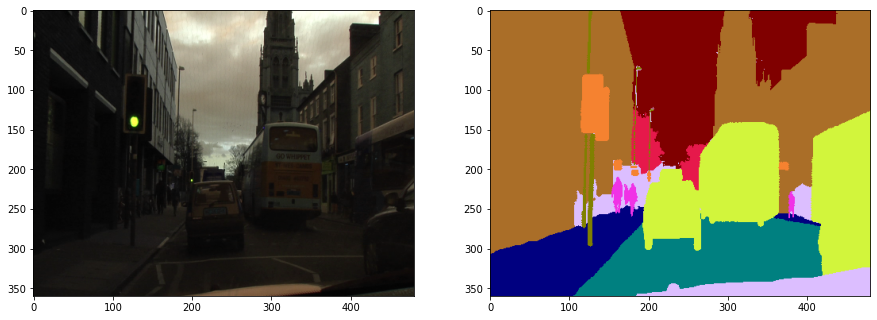

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(seg_img)
plt.show()

In [ ]:
img.shape[0]

360

# Load Dataset

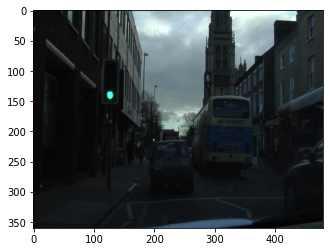

In [ ]:
image_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb, cmap='gray')
plt.show()

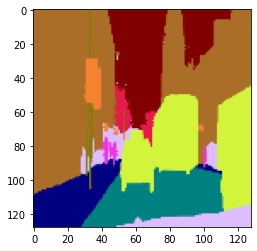

In [ ]:
# resize test
img_size = 128
new_img = cv2.resize(seg_img, (img_size, img_size))
plt.imshow(new_img, cmap='gray')
plt.show()

In [ ]:
# load, normalize and resize image

# image
train_data_image = []
img_size = 128
for image in list_img_train:
  img = cv2.imread(images_train_path + image)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (img_size, img_size))
  img = img/255.0
  train_data_image.append(img)
print('jumlah data train :', len(train_data_image))

jumlah data train : 367


In [ ]:
# anotation
train_anot_image = []
img_size = 128
for anot in list_annot_train:
  anot = cv2.imread(anots_train_path + anot, flags=cv2.IMREAD_UNCHANGED)
  anot = cv2.resize(anot, (img_size, img_size))
  train_anot_image.append(anot)
print('jumlah anot train :', len(train_anot_image))

jumlah anot train : 367


In [ ]:
# image test
test_data_image = []
img_size = 128
for image in list_img_test:
  img = cv2.imread(images_test_path + image)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (img_size, img_size))
  img = img/255.0
  test_data_image.append(img)
print('jumlah data train :', len(test_data_image))


jumlah data train : 101


In [ ]:
# anot test
test_anot_image = []
img_size = 128
for anot in list_annot_test:
  anot = cv2.imread(anots_test_path + anot, flags=cv2.IMREAD_UNCHANGED)
  anot = cv2.resize(anot, (img_size, img_size))
  test_anot_image.append(anot)
print('jumlah anot train :', len(test_anot_image))

jumlah anot train : 101


In [ ]:
# check image unique values
values, counts = np.unique(test_data_image, return_counts=True)
values, counts

(array([0.00392157, 0.00784314, 0.01176471, 0.01568627, 0.01960784,
        0.02352941, 0.02745098, 0.03137255, 0.03529412, 0.03921569,
        0.04313725, 0.04705882, 0.05098039, 0.05490196, 0.05882353,
        0.0627451 , 0.06666667, 0.07058824, 0.0745098 , 0.07843137,
        0.08235294, 0.08627451, 0.09019608, 0.09411765, 0.09803922,
        0.10196078, 0.10588235, 0.10980392, 0.11372549, 0.11764706,
        0.12156863, 0.1254902 , 0.12941176, 0.13333333, 0.1372549 ,
        0.14117647, 0.14509804, 0.14901961, 0.15294118, 0.15686275,
        0.16078431, 0.16470588, 0.16862745, 0.17254902, 0.17647059,
        0.18039216, 0.18431373, 0.18823529, 0.19215686, 0.19607843,
        0.2       , 0.20392157, 0.20784314, 0.21176471, 0.21568627,
        0.21960784, 0.22352941, 0.22745098, 0.23137255, 0.23529412,
        0.23921569, 0.24313725, 0.24705882, 0.25098039, 0.25490196,
        0.25882353, 0.2627451 , 0.26666667, 0.27058824, 0.2745098 ,
        0.27843137, 0.28235294, 0.28627451, 0.29

In [ ]:
# check anotation unique values
values, counts = np.unique(test_anot_image, return_counts=True)
values, counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=uint8),
 array([ 446403, 1276806,   37065, 1442874,  441087,  809292,   52356,
         154332,   90768,   36465,  109377,   67527]))

In [ ]:
# save data
pickle_out = open('train_data_image.pickle', 'wb')
pickle.dump(train_data_image, pickle_out)
pickle_out.close()

pickle_out = open('train_anot_image.pickle', 'wb')
pickle.dump(train_anot_image, pickle_out)
pickle_out.close()

pickle_out = open('test_data_image.pickle', 'wb')
pickle.dump(train_anot_image, pickle_out)
pickle_out.close()

pickle_out = open('test_anot_image.pickle', 'wb')
pickle.dump(train_anot_image, pickle_out)
pickle_out.close()

In [ ]:
# read data
img_train_in = open('/content/drive/MyDrive/IndonesiaAI/Computer Vision/train_data_image.pickle', 'rb')
train_image = pickle.load(img_train_in)

anot_train_in = open('/content/drive/MyDrive/IndonesiaAI/Computer Vision/train_anot_image.pickle', 'rb')
train_anot = pickle.load(anot_train_in)

img_test_in = open('/content/drive/MyDrive/IndonesiaAI/Computer Vision/test_data_image.pickle', 'rb')
test_image = pickle.load(img_test_in)

anot_test_in = open('/content/drive/MyDrive/IndonesiaAI/Computer Vision/test_anot_image.pickle', 'rb')
test_anot = pickle.load(anot_test_in)

In [ ]:
test_image = test_data_image.copy()
test_anot = test_anot_image.copy()
train_anot = train_anot_image.copy()

In [ ]:
# change to array
train_image = np.array(train_image)
train_anot = np.array(train_anot)

test_image = np.array(test_image)
test_anot = np.array(test_anot)

In [ ]:
train_image.shape

(367, 128, 128, 3)

In [ ]:
train_anot.shape

(367, 128, 128)

In [ ]:
test_image.shape

(101, 128, 128, 3)

In [ ]:
test_anot.shape

(101, 128, 128)

# Process Image

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, MaxPooling2D, Dropout, concatenate
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models

In [ ]:
# num classes
num_classes = len(np.unique(train_anot))

# one hot label
train_labels = keras.utils.to_categorical(train_anot, num_classes)
val_labels = keras.utils.to_categorical(test_anot, num_classes)

In [ ]:
print('y_train shape :', train_labels.shape)
print('y_test shape :', val_labels.shape)

y_train shape : (367, 128, 128, 12)
y_test shape : (101, 128, 128, 12)


In [ ]:
np.unique(train_labels)

array([0., 1.], dtype=float32)

# UNet

In [ ]:
def UNet(image_size, ch_in=1, ch_out=2): # 1 is for gray image, 2 for binary-class segmentation
    
    inputs = Input(shape=(image_size, image_size, ch_in), name='input')

    # The contraction path
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    drop4 = Dropout(0.5)(conv4) # optional to tackle overfitting issue
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    # The bottleneck
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    drop5 = Dropout(0.5)(conv5) # optional to tackle overfitting issue

    # The expansion path
    up6 = Conv2D(512, 2, activation='relu', padding='same')(UpSampling2D(size=(2,2))(drop5))
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = Conv2D(256, 2, activation='relu', padding='same')(UpSampling2D(size=(2,2))(conv6))
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = Conv2D(128, 2, activation='relu', padding='same')(UpSampling2D(size=(2,2))(conv7))
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = Conv2D(64, 2, activation='relu', padding='same')(UpSampling2D(size=(2,2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)
    
    conv9 = Conv2D(ch_out, 1, activation='softmax')(conv9)

    outputs = conv9
    
    model = Model(inputs, outputs)

    return model

In [ ]:
train_shape = train_image[0].shape
train_shape[-1]

3

In [ ]:
train_shape[0]

128

In [ ]:
model = UNet(image_size=train_shape[0], ch_in=train_shape[-1], ch_out=num_classes)
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.MeanIoU(num_classes=num_classes)])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_69 (Conv2D)             (None, 128, 128, 64  1792        ['input[0][0]']                  
                                )                                                                 
                                                                                                  
 conv2d_70 (Conv2D)             (None, 128, 128, 64  36928       ['conv2d_69[0][0]']              
                                )                                                           

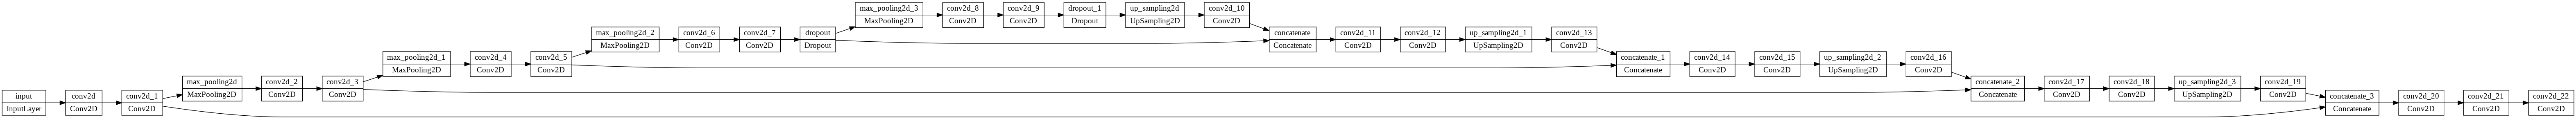

In [ ]:
import tensorflow as tf

tf.keras.utils.plot_model(model, rankdir='LR')

# Train Model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Save the checkpoint in the /output folder
path = '/content/drive/MyDrive/IndonesiaAI/Computer Vision/'
file_path = path + "checkpoints/model_UNet.hdf5"

# Keep only a single checkpoint, the best over test accuracy.
checkpoint = ModelCheckpoint(file_path, 
                             monitor='val_accuracy', 
                             verbose=1, periode=5, 
                             mode='max', 
                             save_best_only=True)
# early stoping
es = EarlyStopping(monitor='val_loss',
                   patience=15,
                   verbose=1,
                   mode='min')

In [ ]:
history = model.fit(train_image, 
                    train_labels, 
                    validation_data=(test_image, val_labels), 
                    epochs=40, 
                    batch_size=4, 
                    callbacks=[checkpoint, es])

Epoch 1/40
92/92 [==============================] - ETA: 0s - loss: 1.8687 - accuracy: 0.4269 - mean_io_u_2: 0.4585
Epoch 1: val_accuracy improved from -inf to 0.55934, saving model to /content/drive/MyDrive/IndonesiaAI/Computer Vision/checkpoints/model_UNet.hdf5
92/92 [==============================] - 54s 137ms/step - loss: 1.8687 - accuracy: 0.4269 - mean_io_u_2: 0.4585 - val_loss: 1.5581 - val_accuracy: 0.5593 - val_mean_io_u_2: 0.4583
Epoch 2/40
92/92 [==============================] - ETA: 0s - loss: 1.1409 - accuracy: 0.6491 - mean_io_u_2: 0.4603
Epoch 2: val_accuracy improved from 0.55934 to 0.60665, saving model to /content/drive/MyDrive/IndonesiaAI/Computer Vision/checkpoints/model_UNet.hdf5
92/92 [==============================] - 12s 133ms/step - loss: 1.1409 - accuracy: 0.6491 - mean_io_u_2: 0.4603 - val_loss: 1.1434 - val_accuracy: 0.6067 - val_mean_io_u_2: 0.4583
Epoch 3/40
92/92 [==============================] - ETA: 0s - loss: 0.9806 - accuracy: 0.6886 - mean_io_u_2: 

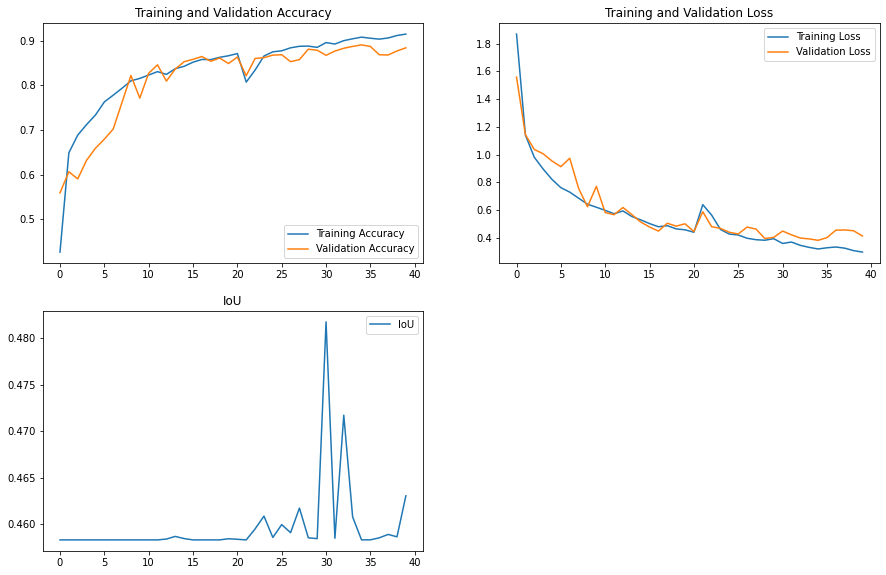

In [ ]:
# plot learning curve
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
IoU = history.history['val_mean_io_u_2']

epochs_range = range(40)

plt.figure(figsize=(15, 15))
plt.subplot(3, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(3, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.subplot(3, 2, 3)
plt.plot(epochs_range, IoU, label='IoU')
plt.legend(loc='upper right')
plt.title('IoU')
plt.show()

In [ ]:
# eval model
def eval_model(model, X_train, y_train, X_test, y_test):
  train_acc = round(model.evaluate(X_train, y_train, verbose=0)[1], 2)
  test_acc = round(model.evaluate(X_test, y_test, verbose=0)[1], 2)
  print('Train accurary :', train_acc,'. Test accurary :', test_acc)

In [ ]:
Unet_model = keras.models.load_model('/content/drive/MyDrive/IndonesiaAI/Computer Vision/checkpoints/model_UNet.hdf5')
eval_model(Unet_model, train_image, train_labels, test_image, val_labels)

4/4 [==============================] - 1s 148ms/step - loss: 0.3815 - accuracy: 0.8904 - mean_io_u_2: 0.4583
Train accurary : 0.91 . Test accurary : 0.89
